In [2]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('train dataset shape:', train_images.shape, train_labels.shape)
print('test dataset shape:', test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

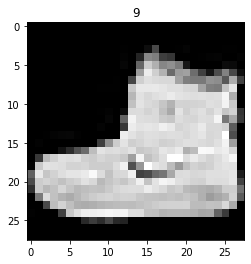

In [5]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [8]:
train_images[0,:,:], train_labels[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

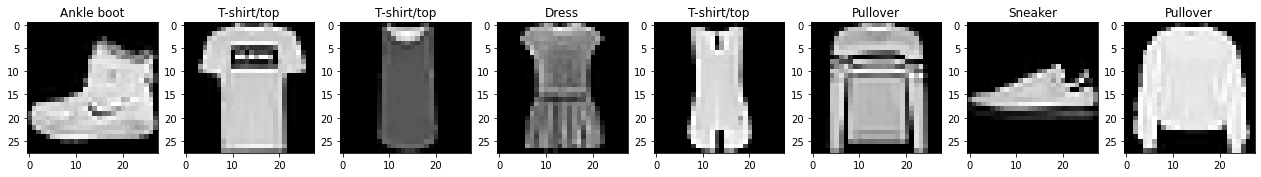

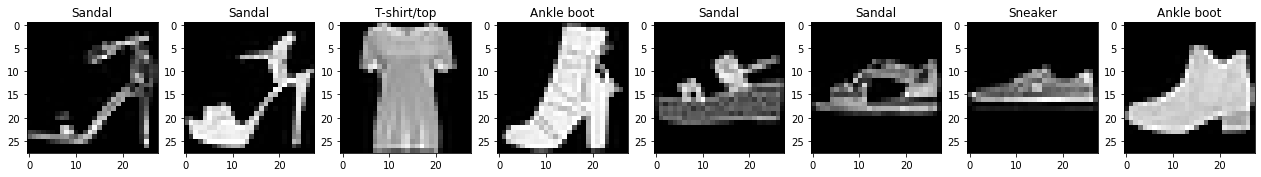

In [11]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_name[labels[i]])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

#### 데이터 전처리 수행

- 0 ~ 255 사이의 픽셀 값을 0 ~ 1 사이 값으로 변환
- array type은 float32

In [15]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print('train dataset shape:', train_images.shape, train_labels.shape)
print('test dataset shape:', test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


#### Danse Layer 기반으로 모델을 생성

In [19]:
INPUT_SIZE = 28

In [20]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### 모델의 Loss와 Optimizer 설정하고 학습 수행

* loss는 categorical_crossentropy로, optimizer는 Adam으로 설정
* categorical crossentropy를 위해서 Lable을 OHE 로 변경

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [28]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf

In [33]:
with tf.device('/device:GPU:0'): 
    history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1126 - accuracy: 0.9571
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1106 - accuracy: 0.9587
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1093 - accuracy: 0.9584
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1092 - accuracy: 0.9585
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1050 - accuracy: 0.9605
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1034 - accuracy: 0.9603
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1019 - accuracy: 0.9620
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1025 - accuracy: 0.9620
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1002 - accuracy: 0.9621
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.097

In [38]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.11264251917600632, 0.11061368882656097, 0.10929132252931595, 0.10920735448598862, 0.10499212890863419, 0.1033681184053421, 0.10185673832893372, 0.10245940089225769, 0.10018831491470337, 0.0979326069355011, 0.09911242872476578, 0.09556020796298981, 0.09396855533123016, 0.09711953997612, 0.09477349370718002, 0.09118294715881348, 0.09074226766824722, 0.08691388368606567, 0.08986718207597733, 0.0870894193649292]
[0.9571333527565002, 0.9586666822433472, 0.9583666920661926, 0.9585000276565552, 0.9604833126068115, 0.960266649723053, 0.961983323097229, 0.9620333313941956, 0.9621166586875916, 0.9639333486557007, 0.9632666707038879, 0.9638833403587341, 0.9651333093643188, 0.9638500213623047, 0.9636499881744385, 0.9661499857902527, 0.9662666916847229, 0.9665499925613403, 0.9662500023841858, 0.9674333333969116]


### 테스트 데이터를 기반으로 Label 값 예측
* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함. 
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [40]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

(10000, 10)


In [49]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))
print('predicted class value:', pred)

softmax output: [[1.8690302e-22 5.7499074e-22 0.0000000e+00 2.0315718e-28 5.4692390e-28
  1.5962027e-13 3.0282675e-29 9.0192344e-08 4.0561123e-33 9.9999988e-01]]
predicted class value: 9


In [50]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

target class value: 9.0 predicted class value: 9


### 테스트 데이터 세트로 모델 성능 검증

In [51]:
model.evaluate(test_images, test_oh_labels, batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 0.6372 - accuracy: 0.8864


[0.6372392177581787, 0.8863999843597412]

### 검증 데이터 세트를 이용하여 학습 수행. 
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예: Learning Rate)등의 작업이 어려움. 
* fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐. 
* 검증 데이터 세트를 fit() 시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아 지지 않을 때 Callback을 사용하여 Learning Rate 보정 작업등을 수행 가능

In [54]:
import numpy as np 
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [55]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

train과 validation shape: (51000, 28, 28) (51000,) (9000, 28, 28) (9000,)
after OHE: (51000, 10) (9000, 10)


### 검증 데이터 세트를 적용하여 학습 수행

In [59]:
INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), 
                    epochs=20, verbose=1)

Epoch 1/20
399/399 [==============================] - 2s 5ms/step - loss: 0.6008 - accuracy: 0.7930 - val_loss: 0.5005 - val_accuracy: 0.8183
Epoch 2/20
399/399 [==============================] - 2s 4ms/step - loss: 0.4087 - accuracy: 0.8563 - val_loss: 0.4212 - val_accuracy: 0.8483
Epoch 3/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3699 - accuracy: 0.8689 - val_loss: 0.3825 - val_accuracy: 0.8642
Epoch 4/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3453 - accuracy: 0.8765 - val_loss: 0.3692 - val_accuracy: 0.8669
Epoch 5/20
399/399 [==============================] - 1s 4ms/step - loss: 0.3236 - accuracy: 0.8835 - val_loss: 0.3446 - val_accuracy: 0.8768
Epoch 6/20
399/399 [==============================] - 2s 4ms/step - loss: 0.3096 - accuracy: 0.8875 - val_loss: 0.3392 - val_accuracy: 0.8779
Epoch 7/20
399/399 [==============================] - 1s 4ms/step - loss: 0.2948 - accuracy: 0.8929 - val_loss: 0.3534 - val_accuracy: 0.8726
Epoch 

In [61]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

[0.6008362174034119, 0.4086809456348419, 0.36994054913520813, 0.34525471925735474, 0.32364344596862793, 0.30964556336402893, 0.2948073744773865, 0.2841251790523529, 0.27404290437698364, 0.26594284176826477, 0.25633591413497925, 0.25010696053504944, 0.2421943098306656, 0.23492857813835144, 0.23149153590202332, 0.2235420048236847, 0.21797120571136475, 0.21385860443115234, 0.20732347667217255, 0.20358170568943024]
[0.7930195927619934, 0.8563137054443359, 0.8689411878585815, 0.8765097856521606, 0.8835294246673584, 0.8874706029891968, 0.8929215669631958, 0.8960391879081726, 0.901215672492981, 0.9030980467796326, 0.9056862592697144, 0.9069607853889465, 0.9104313850402832, 0.9134901762008667, 0.9140195846557617, 0.9170588254928589, 0.919176459312439, 0.9210196137428284, 0.9233529567718506, 0.9251960515975952]
[0.5005223751068115, 0.4211958348751068, 0.3824646472930908, 0.36924394965171814, 0.34456706047058105, 0.3391827642917633, 0.3534383773803711, 0.3310733735561371, 0.32340335845947266, 0.

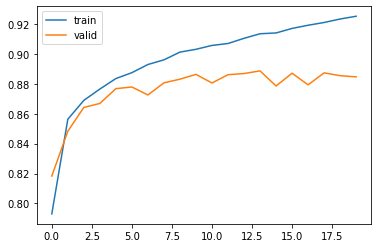

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

### Functional API

In [63]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model1 = Sequential()
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)        

In [66]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model

input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
x = Flatten()(input_tensor)
x = Dense(100, activation='relu')(x)
x = Dense(30, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 30)                3030      
                                                                 
 dense_14 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


### Custom한 Dense Layer 생성하기

In [68]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

class CustomDense(tf.keras.layers.Layer):
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units
        
    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer='random_normal',
            trainable=True
        )
        self.b = self.add_weight(
            shape=(self.units,),
            initializer='random_normal',
            trainable=True
        )
    # CustomDense 객체에 callable로 입력된 입력 데이터 처리
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [69]:
inputs = Input((4,))
outputs = CustomDense(10)(inputs)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense (CustomDense)  (None, 10)                50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


### Functional API는 객체 생성 부분과 Callable 인자 입력 부분을 별도로 수행해도 무방.

In [70]:
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
my_layer = CustomDense(10)
outputs = my_layer(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_1 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


### Sequential Model 생성은 단지 Functional API Layer들을 iteration 하면서 연결한 것을 model로 만든 것임

In [72]:
from tensorflow.keras.models import Sequential

model = Sequential([Input((4,)),
                    CustomDense(10),
                    CustomDense(8),
                    tf.keras.layers.ReLU()])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom_dense_4 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_5 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu_1 (ReLU)              (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### Sequential Model을 Functional 객체를 For loop 반복 호출하여 작성

In [73]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

inputs = None
callable_inputs = None
outputs = None
# layers_list에 있는 Functional 객체를 iteration 수행하면서 적용. 
for index, layer in enumerate(layers_list):
    # layers_list의 첫번째 인자는 Input 간주. 
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # Functional 객체에 callable 인자로 callable_inputs를 입력하고 반환 결과 값을 다시 callable_inputs로 할당.     
    else: 
        callable_inputs = layer(callable_inputs)
    
outputs = callable_inputs
model = Model(inputs, outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4)]               0         
                                                                 
 custom_dense_6 (CustomDense  (None, 10)               50        
 )                                                               
                                                                 
 custom_dense_7 (CustomDense  (None, 8)                88        
 )                                                               
                                                                 
 re_lu_2 (ReLU)              (None, 8)                 0         
                                                                 
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


### 앞에서 생성한 로직들을 함수화 
* Functional API로 모델 만들기
* pixel값 1 ~ 255를 0 ~ 1사이값 Float 32로 만들기
* One Hot Encoding Label에 적용하기
* 학습과 검증 데이터로 나누기.
* compile, 학습/예측/평가

In [75]:
INPUT_SIZE = 28

def create_model():
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation='relu')(x)
    x = Dense(30, activation='relu')(x)
    output = Dense(10, activation='softmax')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    return model

model = create_model()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 30)                3030      
                                                                 
 dense_17 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [76]:
# 0 ~ 1 사이값의 float32로 변경하는 함수
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

# 0 ~ 1 사이값 float32로 변경하는 함수 호출 한 뒤 OHE 적용
def get_preprocessed_ohe(images, labels):
    images, labels = get_preprocessed_data(images, labels)
    oh_labels = to_categorical(labels)
    return images, oh_labels

# 학습/검증/테스트 데이터 세트에 전처리 및 ohe 적용한 뒤 반환
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021):
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    return (tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

In [79]:
# Fashion MNIST 데이터 재 로딩 및 전처리 적용하여 학습/검증/데이터 세트 생성. 

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000, 10)


In [80]:
# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 30)                3030      
                                                                 
 dense_20 (Dense)            (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [81]:
# 학습 수행. 
hostory = model.fit(x=tr_images, y=tr_oh_labels, batch_size=32, epochs=20, validation_data=(val_images, val_oh_labels))

Epoch 1/20
1594/1594 [==============================] - 7s 4ms/step - loss: 0.5175 - accuracy: 0.8171 - val_loss: 0.4323 - val_accuracy: 0.8359
Epoch 2/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3837 - accuracy: 0.8603 - val_loss: 0.3709 - val_accuracy: 0.8659
Epoch 3/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3461 - accuracy: 0.8735 - val_loss: 0.3575 - val_accuracy: 0.8690
Epoch 4/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3230 - accuracy: 0.8813 - val_loss: 0.3455 - val_accuracy: 0.8787
Epoch 5/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3060 - accuracy: 0.8872 - val_loss: 0.3380 - val_accuracy: 0.8776
Epoch 6/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2905 - accuracy: 0.8922 - val_loss: 0.3320 - val_accuracy: 0.8790
Epoch 7/20
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2818 - accuracy: 0.8955 - val_loss: 0.3328 - val_accuracy:

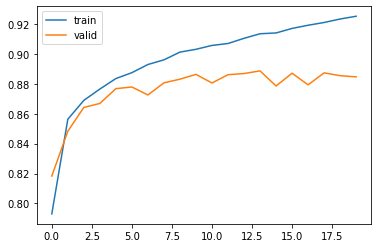

In [82]:
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

In [83]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 5ms/step - loss: 0.3731 - accuracy: 0.8815


[0.3731217682361603, 0.8815000057220459]

### Callback

#### ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 특정 조건에 맞춰서 모델을 파일로 저장
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
* save_weights_only: Weights만 저장할 지 여부 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추. 

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='./save_model/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss',
                         save_best_only=True, save_weights_only=True, mode='min', period=3, verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels),
                    callbacks=[mcp_cb])

Epoch 1/10
399/399 [==============================] - 2s 5ms/step - loss: 0.5901 - accuracy: 0.8008 - val_loss: 0.4694 - val_accuracy: 0.8297
Epoch 2/10
399/399 [==============================] - 1s 4ms/step - loss: 0.4101 - accuracy: 0.8548 - val_loss: 0.3953 - val_accuracy: 0.8569
Epoch 3/10
394/399 [============================>.] - ETA: 0s - loss: 0.3690 - accuracy: 0.8700
Epoch 00003: val_loss improved from inf to 0.36641, saving model to ./save_model\weights.03-0.37.hdf5
399/399 [==============================] - 1s 4ms/step - loss: 0.3685 - accuracy: 0.8703 - val_loss: 0.3664 - val_accuracy: 0.8663
Epoch 4/10
399/399 [==============================] - 1s 4ms/step - loss: 0.3451 - accuracy: 0.8768 - val_loss: 0.3984 - val_accuracy: 0.8549
Epoch 5/10
399/399 [==============================] - 1s 4ms/step - loss: 0.3220 - accuracy: 0.8851 - val_loss: 0.3507 - val_accuracy: 0.8722
Epoch 6/10
396/399 [============================>.] - ETA: 0s - loss: 0.3102 - accuracy: 0.8878
Epoch 0

#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor 
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [88]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

Epoch 1/30
399/399 [==============================] - 2s 5ms/step - loss: 0.5875 - accuracy: 0.8037 - val_loss: 0.4641 - val_accuracy: 0.8301 - lr: 0.0010
Epoch 2/30
399/399 [==============================] - 2s 4ms/step - loss: 0.4172 - accuracy: 0.8527 - val_loss: 0.4115 - val_accuracy: 0.8512 - lr: 0.0010
Epoch 3/30
399/399 [==============================] - 2s 5ms/step - loss: 0.3792 - accuracy: 0.8661 - val_loss: 0.3829 - val_accuracy: 0.8616 - lr: 0.0010
Epoch 4/30
399/399 [==============================] - 1s 4ms/step - loss: 0.3515 - accuracy: 0.8737 - val_loss: 0.3846 - val_accuracy: 0.8589 - lr: 0.0010
Epoch 5/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3319 - accuracy: 0.8794 - val_loss: 0.3573 - val_accuracy: 0.8689 - lr: 0.0010
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3165 - accuracy: 0.8852 - val_loss: 0.3580 - val_accuracy: 0.8686 - lr: 0.0010
Epoch 7/30
399/399 [==============================] - 1s 3ms/step - lo

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [89]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

Epoch 1/30
399/399 [==============================] - 2s 5ms/step - loss: 0.6021 - accuracy: 0.7936 - val_loss: 0.4720 - val_accuracy: 0.8307
Epoch 2/30
399/399 [==============================] - 1s 4ms/step - loss: 0.4220 - accuracy: 0.8530 - val_loss: 0.4192 - val_accuracy: 0.8518
Epoch 3/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3765 - accuracy: 0.8678 - val_loss: 0.3760 - val_accuracy: 0.8631
Epoch 4/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3517 - accuracy: 0.8755 - val_loss: 0.3775 - val_accuracy: 0.8660
Epoch 5/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3348 - accuracy: 0.8795 - val_loss: 0.3634 - val_accuracy: 0.8678
Epoch 6/30
399/399 [==============================] - 2s 4ms/step - loss: 0.3203 - accuracy: 0.8833 - val_loss: 0.3443 - val_accuracy: 0.8756
Epoch 7/30
399/399 [==============================] - 1s 4ms/step - loss: 0.3019 - accuracy: 0.8913 - val_loss: 0.3322 - val_accuracy: 0.8789
Epoch 

In [91]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

mcp_cb = ModelCheckpoint(filepath='./save_model/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', period=1, verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
399/399 [==============================] - 2s 5ms/step - loss: 0.5894 - accuracy: 0.8005 - val_loss: 0.4497 - val_accuracy: 0.8432 - lr: 0.0010
Epoch 2/40
399/399 [==============================] - 2s 4ms/step - loss: 0.4073 - accuracy: 0.8589 - val_loss: 0.4023 - val_accuracy: 0.8542 - lr: 0.0010
Epoch 3/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3690 - accuracy: 0.8693 - val_loss: 0.4040 - val_accuracy: 0.8532 - lr: 0.0010
Epoch 4/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3464 - accuracy: 0.8752 - val_loss: 0.3663 - val_accuracy: 0.8671 - lr: 0.0010
Epoch 5/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3275 - accuracy: 0.8815 - val_loss: 0.3451 - val_accuracy: 0.8757 - lr: 0.0010
Epoch 6/40
399/399 [==============================] - 2s 4ms/step - loss: 0.3059 - accuracy: 0.8890 - val_loss: 0.3425 - val_accuracy: 0.8767 - lr: 0.0010
Epoch 7/40
399/399 [==============================] - 2s 4ms/step - lo